In [1]:
import sympy as sp

In [2]:
u = sp.symbols('u',cls=sp.Function)
t, omega_0 = sp.symbols('t omega_0')
C, s = sp.symbols('C, s')

Equation governing free motion of an SDOF

In [3]:
Equation_of_Motion= sp.diff(u(t),t,2)+omega_0 **2 * u(t)
display(Equation_of_Motion)

omega_0**2*u(t) + Derivative(u(t), (t, 2))

Characteristic equation

In [4]:
CharacteristicEquation = sp.simplify(Equation_of_Motion.subs(u(t), C*sp.exp(s*t)) / (C * sp.exp(s*t)))
display(CharacteristicEquation)

omega_0**2 + s**2

The Eigenvalues

In [5]:
EigenValues = sp.solve(CharacteristicEquation,s)
display(EigenValues)

[-I*omega_0, I*omega_0]

The Eigenfrequencies

In [6]:
EigenFrequency = []
for k in [0,1]:
    EigenFrequency.append(EigenValues[k]/ sp.I)
    display(EigenFrequency[k])

-omega_0

omega_0

The General Solution

In [7]:
C_1, C_2 = sp.symbols('C_1, C_2')
General_Solution_Complex = C_1*sp.exp(EigenValues[0]*t) + C_2*sp.exp(EigenValues[0]*t)
display(General_Solution_Complex)

C_1*exp(-I*omega_0*t) + C_2*exp(-I*omega_0*t)

In [8]:
A_1, A_2 = sp.symbols('A_1, A_2')
General_Solution_Real= A_1*sp.sin(EigenFrequency[0]*t)+A_2*sp.cos(EigenFrequency[1]*t)
display(General_Solution_Real)

-A_1*sin(omega_0*t) + A_2*cos(omega_0*t)

In [9]:
A, phi = sp.symbols('A phi')
General_Solution_Real_Compact =A*sp.cos(EigenFrequency[1]*t+phi)
display(General_Solution_Real_Compact)

A*cos(omega_0*t + phi)

Visualisation

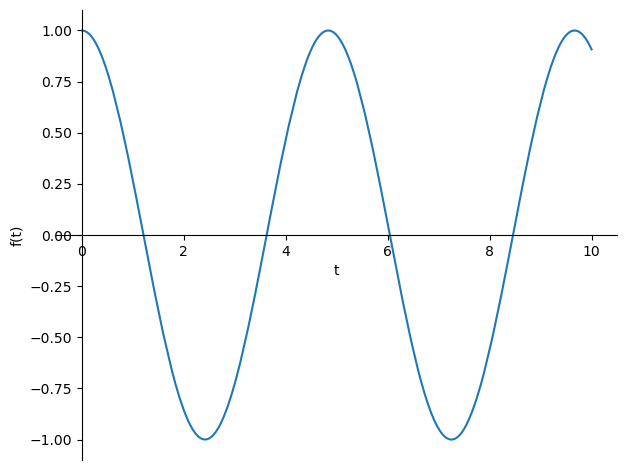

In [10]:
sp.plot(General_Solution_Real_Compact.subs([(A,1),(phi,0),(omega_0, 1.3)]),(t,0,10));

In [11]:
%matplotlib notebook

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [13]:
General_Solution_Real_Compact_func = sp.lambdify((t,A,phi,omega_0),General_Solution_Real_Compact)

<IPython.core.display.Javascript object>


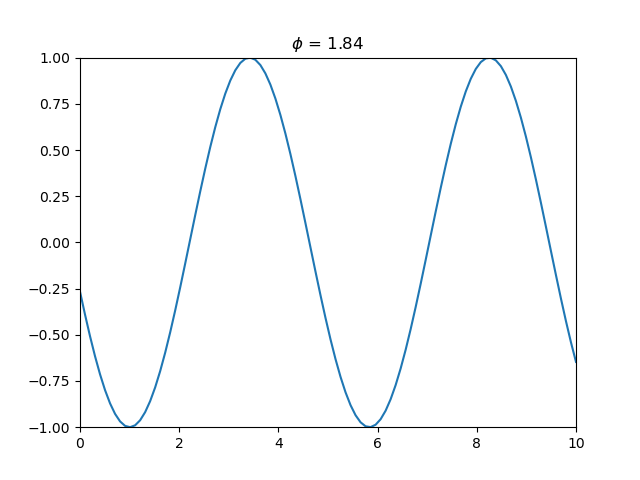

In [17]:
fig, ax = plt.subplots()
tdata = np.linspace(0,10,100)
line, = ax.plot([], [])
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

def update(frame):
    ydata = General_Solution_Real_Compact_func(t=tdata,A=1,phi=frame,omega_0=1.3)
    ax.set_title("$\phi$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 100),interval = 30)
plt.show()

<IPython.core.display.Javascript object>


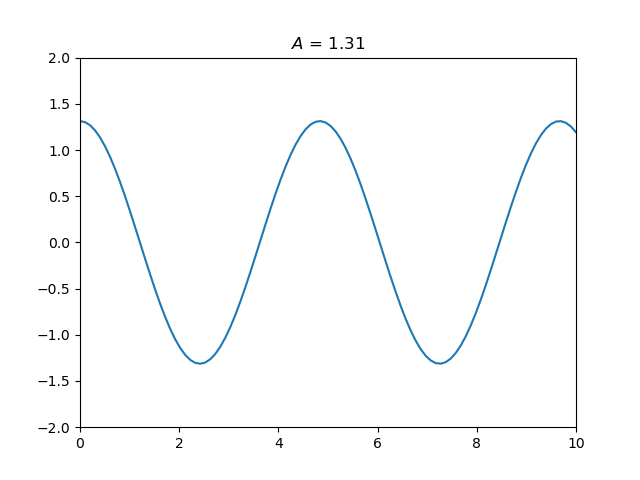

In [18]:
fig, ax = plt.subplots()
tdata = np.linspace(0,10,100)
line, = ax.plot([], [])
ax.set_xlim(0, 10)
ax.set_ylim(-2, 2)

def update(frame):
    ydata = General_Solution_Real_Compact_func(t=tdata,A=frame,phi=0,omega_0=1.3)
    ax.set_title("$A$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(1, 2, 100),interval = 30)
plt.show()

<IPython.core.display.Javascript object>


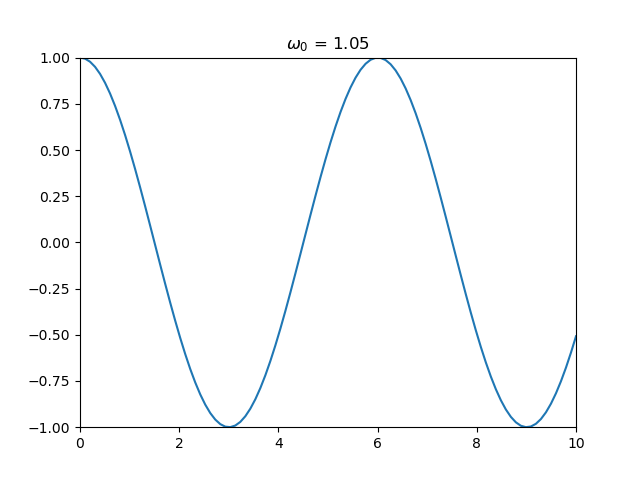

In [19]:
fig, ax = plt.subplots()
tdata = np.linspace(0,10,100)
line, = ax.plot([], [])
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

def update(frame):
    ydata = General_Solution_Real_Compact_func(t=tdata,A=1,phi=0,omega_0=frame)
    ax.set_title("$\omega_0$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(0.3, np.pi, 100),interval = 30)
plt.show()